In [1]:
using PyPlot
include("lib/all.jl");

In [2]:
test_mov()

706048

In [3]:
test_acc()

838752

In [18]:
particles = make_particles(2^20);
t = Tree(particles, 12);

In [19]:
@time group!(t);

  0.127494 seconds (4 allocations: 160 bytes)


In [20]:
@time inform!(t);

  0.049170 seconds (1.02 M allocations: 15.496 MB, 31.06% gc time)


In [21]:
test_in_cell_mass(t)

In [22]:
ax = zeros(length(particles))
ay = zeros(length(particles))
az = zeros(length(particles));

In [23]:
@time interact!(t, 0.3, ax, ay, az, 1.0e-3);

  1.050467 seconds (4 allocations: 160 bytes)


In [24]:
@time collect!(t, ax,ay,az)

  0.276631 seconds (39.10 M allocations: 596.635 MB, 9.00% gc time)


In [25]:
mx,myd,e50,e90,e95,e99,m,s = perf(t.particles, ax,ay,az, 10000, 1.0e-3)
print(myd)

[0.0,0.0,1.0,2.0,1.0,7.0,11.0,23.0,63.0,133.0,252.0,532.0,934.0,1550.0,1960.0,1793.0,1252.0,837.0,391.0,148.0,65.0,33.0,7.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0]

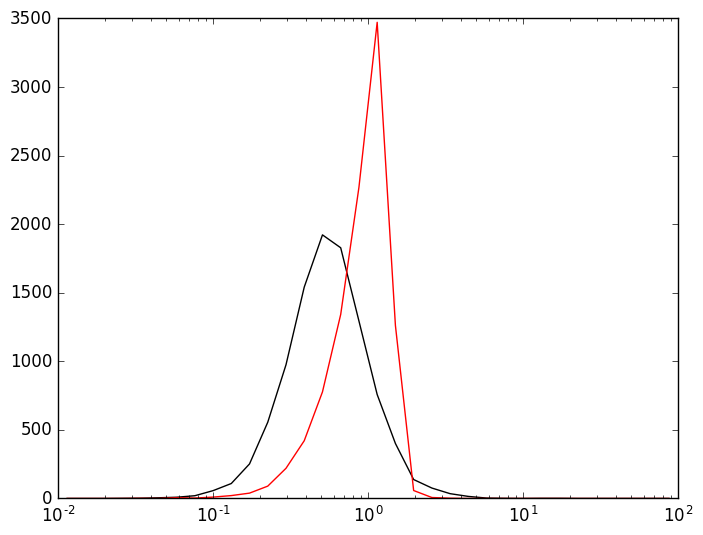

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3f4b634048>

In [14]:
myd = [0.0,0.0,0.0,1.0,2.0,5.0,9.0,20.0,57.0,109.0,252.0,556.0,975.0,1541.0,1922.0,1828.0,1294.0,758.0,401.0,138.0,76.0,35.0,15.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]
my =  [0.0,0.0,0.0,0.0,1.0,0.0,6.0,3.0,10.0,21.0,39.0,90.0,220.0,421.0,777.0,1342.0,2269.0,3472.0,1262.0,58.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
semilogx(10.^mx,myd,"-k")
semilogx(10.^mx,my ,"-r")
#semilogx(10.^mx,myq ,"-g")

In [26]:
e50

0.5463177558409847

In [27]:
e90

1.1461802829035386

In [28]:
e99

2.3010051429480973

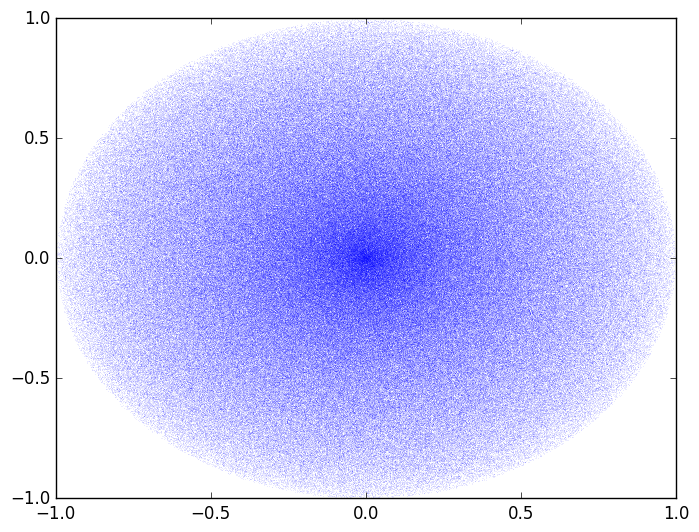

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8826a5e358>

In [37]:
plot([p.x for p in t.particles], [p.y for p in t.particles], ".", ms=0.05)